In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

### Datafield descriptions
1) s.no : Simply, the Index!
2) age : Age of the customer.
3) division_name : Division of the Cloth customer has bought
4) department_name : Department of the Cloth
5) class_name : Class of the Cloth in particular.
6) clothing_id : Clothing ID (Unique to a type of product)
7) title : Title customers write on their feedback/review text
8) review_text : Customer's Review Text
9) alikefeedbackcount : Number of other customers who agrees with the given feedback (as their - experience is quite the same)
10) rating : Rating or stars they've given to the product
11) recommend_index : Whether they'll recommend someone to buy the product or not (0: NO, 1:YES)

In [248]:
dataset = pd.read_csv("Women Dresses Reviews Dataset .csv")
dataset.head(10)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
5,5,43,General,Tops,Sweaters,933,Love the pattern and color,I love this sweater but i'm on the fence about...,0,4,1
6,6,83,General,Tops,Sweaters,937,Beautiful and unique.,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1
7,7,34,General,Tops,Knits,868,Unique and wonderful,The sweater is comfortable and a good weight. ...,2,5,1
8,8,49,General Petite,Tops,Fine gauge,900,Great look all in one,I love everything about this sweater. it is ve...,4,5,1
9,9,49,General,Tops,Knits,873,Beauty meets comfort,"I love this top, the details at the neck and s...",0,5,1


In [249]:
dataset.shape

(23486, 11)

In [250]:
dataset["department_name"].value_counts()

department_name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

In [251]:
dataset.isnull().sum()

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [252]:
# This counts nan as unique value
distinct_count = dataset["department_name"].nunique(dropna=False)
print(distinct_count)

7


In [253]:
# This does not include nans.
distinct_count = dataset["department_name"].nunique()
print(distinct_count)

6


In [254]:
dataset["class_name"].value_counts()

class_name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [255]:
# This counts nan as unique value
distinct_count = dataset["class_name"].nunique(dropna=False)
print(distinct_count)

21


In [256]:
# This does not include nans.
distinct_count = dataset["class_name"].nunique()
print(distinct_count)

20


In [257]:
dataset["class_name"].unique()

array(['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits',
       'Fine gauge', 'Jackets', 'Dresses', 'Shorts', 'Lounge',
       'Outerwear', 'Intimates', 'Legwear', 'Sleep', 'Trend', 'Layering',
       nan, 'Casual bottoms', 'Chemises'], dtype=object)

In [258]:
# Class_namen muuttaminen luokitelluksi muuttujaksi, jolla numeroarvo
dataset["class_name_C"]= dataset["class_name"].replace({'Jeans':1,'Blouses':2,'Skirts':3,'Pants':4,'Swim':5,'Sweaters':6,'Knits':7,'Fine gauge':8,'Jackets':9, 'Dresses':10, 'Shorts':11,'Lounge':12,'Outerwear':13,'Intimates':14,'Legwear':15,'Sleep':16,'Trend':17,"Trend":18, 'Layering':10,'Casual bottoms':12,'Chemises': 2})


U:\Users\ok025980\AppData\Local\Temp\ipykernel_2736\4135554414.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["class_name_C"]= dataset["class_name"].replace({'Jeans':1,'Blouses':2,'Skirts':3,'Pants':4,'Swim':5,'Sweaters':6,'Knits':7,'Fine gauge':8,'Jackets':9, 'Dresses':10, 'Shorts':11,'Lounge':12,'Outerwear':13,'Intimates':14,'Legwear':15,'Sleep':16,'Trend':17,"Trend":18, 'Layering':10,'Casual bottoms':12,'Chemises': 2})


In [259]:
dataset.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,class_name_C
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,1.0
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,2.0
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,3.0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,4.0
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,5.0


In [260]:
# columns = dataset.columns.tolist()
# columns

In [261]:
colnames = dataset.columns
colnames

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index ', 'class_name_C'],
      dtype='object')

In [262]:
df = dataset[['age','alike_feedback_count','rating','recommend_index ']]
df.head(5)

,age,alike_feedback_count,rating,recommend_index
0,40,0,5,1
1,62,12,5,1
2,47,3,1,0
3,45,0,5,1
4,37,0,5,1


In [263]:
df.shape

(23486, 4)

In [264]:
x = df
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.26048296, -0.44473881,  0.72429116,  0.4647678 ],
       [ 1.53115271,  1.65975636,  0.72429116,  0.4647678 ],
       [ 0.30958293,  0.08138498, -2.87928943, -2.15161203],
       ...,
       [-1.1563008 , -0.44473881,  0.72429116,  0.4647678 ],
       [ 1.12396278,  1.30900716,  0.72429116,  0.4647678 ],
       [ 1.0425248 , -0.44473881,  0.72429116,  0.4647678 ]])

In [265]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result   
# wcss

Text(0, 0.5, 'WCSS')

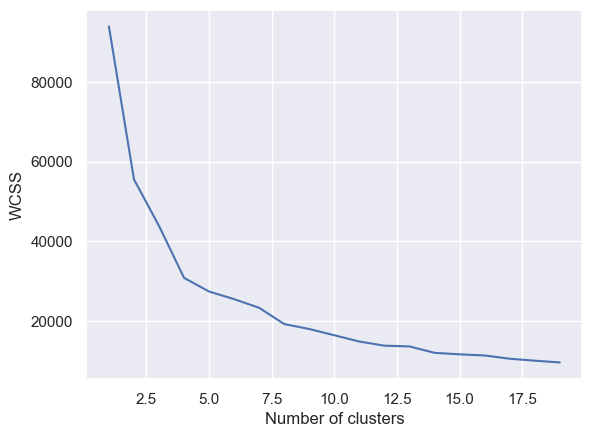

In [266]:
plt.plot(range(1,20),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [267]:
# from scipy.cluster import hierarchy
# dendrogrammi = hierarchy.dendrogram(hierarchy.linkage(x_scaled, method = "ward"))

### Clustering

k-arvolla 4

In [268]:
# base on result cluster size 4 suitable
kmean4 = KMeans(4)
kmean4.fit(x_scaled)
data_with_clusters = df.copy()
data_with_clusters["Clusters4"] = kmean4.fit_predict(x_scaled)

In [269]:
data_with_clusters.head()

,age,alike_feedback_count,rating,recommend_index,Clusters4
0,40,0,5,1,0
1,62,12,5,1,1
2,47,3,1,0,2
3,45,0,5,1,0
4,37,0,5,1,0


In [270]:
# data_with_clusters = data_with_clusters.sample(frac=0.01,random_state=42)

Text(0, 0.5, 'alike_feedback_count')

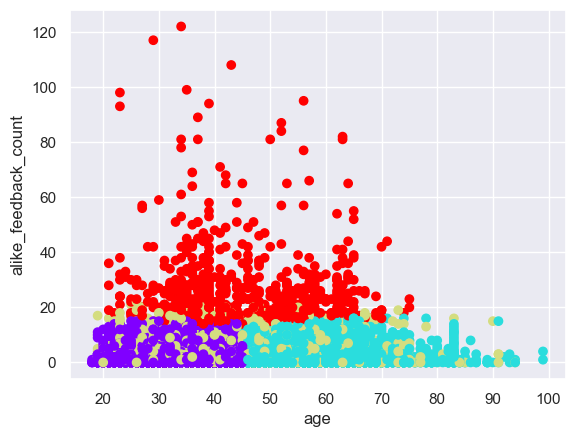

In [271]:
plt.scatter(data_with_clusters["age"],data_with_clusters["alike_feedback_count"],c= data_with_clusters["Clusters4"],cmap= "rainbow")
plt.xlabel("age")
plt.ylabel("alike_feedback_count")

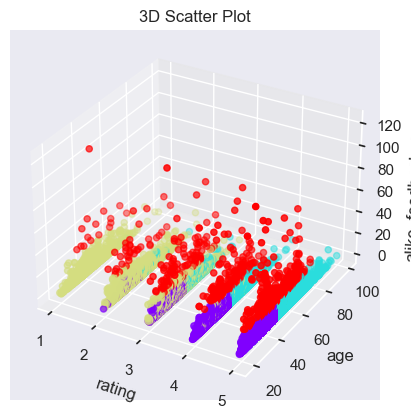

In [272]:
# Generate sample 3D data using make_blobs
X= data_with_clusters[['age','alike_feedback_count','rating']]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['rating'],X['age'], X['alike_feedback_count'], c= data_with_clusters["Clusters4"], marker='o',cmap= "rainbow")

# Set labels and title
ax.set_xlabel('rating')
ax.set_ylabel('age')
ax.set_zlabel('alike_feedback_count')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

In [273]:
data_with_clusters["Clusters4"].value_counts()

Clusters4
0    11401
1     7364
2     4055
3      666
Name: count, dtype: int64

k-arvolla 6

In [274]:
# base on result cluster size 4 suitable
kmean6 = KMeans(6)
kmean6.fit(x_scaled)
data_with_clusters["Clusters6"] = kmean6.fit_predict(x_scaled)

In [275]:
data_with_clusters["Clusters6"].value_counts()

Clusters6
0    5708
2    4730
4    4495
1    4039
5    3894
3     620
Name: count, dtype: int64

In [276]:
data_with_clusters.head()

,age,alike_feedback_count,rating,recommend_index,Clusters4,Clusters6
0,40,0,5,1,0,0
1,62,12,5,1,1,2
2,47,3,1,0,2,1
3,45,0,5,1,0,0
4,37,0,5,1,0,0


### Mukaan myös tuotteesta jotain

In [294]:
df_cleaned = dataset.dropna(subset=['class_name_C'])


In [296]:
df_large= df_cleaned[['age','class_name_C','alike_feedback_count','rating','recommend_index ']]
df_large.head(5)

,age,class_name_C,alike_feedback_count,rating,recommend_index
0,40,1.0,0,5,1
1,62,2.0,12,5,1
2,47,3.0,3,1,0
3,45,4.0,0,5,1
4,37,5.0,0,5,1


In [297]:
df_large.shape

(23472, 5)

In [ ]:
# df_large.isnull()

# empty_cells = df_large.isnull()
# empty_cells.value_counts()

age    class_name_C  alike_feedback_count  rating  recommend_index 
False  False         False                 False   False               23472
       True          False                 False   False                  14
Name: count, dtype: int64

In [298]:
x = df_large
xl_scaled = preprocessing.scale(x)
xl_scaled


# x = df
# x_scaled = preprocessing.scale(x)
# x_scaled

array([[-0.26063009, -1.71173005, -0.44484289,  0.72462051,  0.46493634],
       [ 1.53080585, -1.43027683,  1.6591373 ,  0.72462051,  0.46493634],
       [ 0.30937226, -1.14882362,  0.08115216, -2.87844962, -2.15083208],
       ...,
       [-1.15634806, -0.02301077, -0.44484289,  0.72462051,  0.46493634],
       [ 1.12366132,  0.82134887,  1.30847394,  0.72462051,  0.46493634],
       [ 1.04223241,  0.53989566, -0.44484289,  0.72462051,  0.46493634]])

In [ ]:
# # base on result cluster size 4 suitable
# kmean4 = KMeans(4)
# kmean4.fit(x_scaled)
# data_with_clusters = df.copy()
# data_with_clusters["Clusters4"] = kmean4.fit_predict(x_scaled)

In [303]:
# base on result cluster size 4 suitable
kmean4_large = KMeans(4)
kmean4_large.fit(xl_scaled)
data_with_clusters_large = df_large.copy()
data_with_clusters_large["ClustersL4"] = kmean4_large.fit_predict(xl_scaled)

In [304]:
data_with_clusters_large["ClustersL4"].value_counts()

ClustersL4
1    8794
0    5369
2    5143
3    4166
Name: count, dtype: int64